In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
df1=pd.read_csv('ttrain.csv')
df2=pd.read_csv('ttest.csv')

In [3]:
#kaggle da basarimizi olcecegiz %40 uzerinde cikarsa basarili

## EDA Exploratory Data Anaylise

In [4]:
df1.shape

(891, 12)

In [5]:
df2.shape

(418, 11)

In [6]:
df1.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
419,420,0,3,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,24.15,NaN,S


In [7]:
df2.sample()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
260,1152,3,"de Messemaeker, Mr. Guillaume Joseph",male,36.5,1,0,345572,17.4,NaN,S


In [8]:
df = df1.append(df2) # verileri birlestirdik

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [10]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [11]:
1014/1309
# %20 den fazlasi bos olan birveriyi silebilirsiniz

0.774637127578304

bos verileri doldurmanin 7 farklli yontemi var

1- Mean -ortalama
2- Median orta deger
3- En yakin komsu
4- Regression
5- Fforward
6- Bbackforward
7- En uygun olani ile doldur
 

In [12]:
df['Fare'].mean(), df['Fare'].max(), df['Fare'].min(), df['Fare'].std()

(33.2954792813456, 512.3292, 0.0, 51.75866823917414)

In [13]:
df['Fare']=df['Fare'].fillna(df['Fare'].mean()) #fillna ile doldurduk

In [14]:
import seaborn as sns

<AxesSubplot:xlabel='Embarked', ylabel='count'>

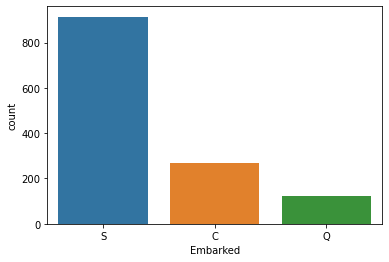

In [15]:
sns.countplot(x=df['Embarked'])

In [16]:
df['Embarked'].value_counts(normalize=True)

S    0.699311
C    0.206580
Q    0.094109
Name: Embarked, dtype: float64

In [17]:
# df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode)
df['Embarked']=df['Embarked'].fillna('S')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

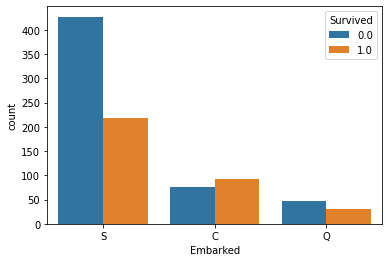

In [18]:
sns.countplot(x='Embarked', hue='Survived',data=df)

In [19]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [20]:
# cabin sutununu silmek icin iki yol var
del df['Cabin'] 
# df.drop('Cabin',axis=1,implace=True)

In [21]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [22]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
384,385,0.0,3,"Plotcharsky, Mr. Vasil",male,NaN,0,0,349227,7.8958,S
363,1255,NaN,3,"Strilic, Mr. Ivan",male,27.0,0,0,315083,8.6625,S
344,1236,NaN,3,"van Billiard, Master. James William",male,NaN,1,1,A/5. 851,14.5000,S
571,572,1.0,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,S
37,929,NaN,3,"Cacic, Miss. Manda",female,21.0,0,0,315087,8.6625,S
248,1140,NaN,2,"Hold, Mrs. Stephen (Annie Margaret Hill)",female,29.0,1,0,26707,26.0000,S
194,1086,NaN,2,"Drew, Master. Marshall Brines",male,8.0,0,2,28220,32.5000,S
744,745,1.0,3,"Stranden, Mr. Juho",male,31.0,0,0,STON/O 2. 3101288,7.9250,S
541,542,0.0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.2750,S
253,1145,NaN,3,"Salander, Mr. Karl Johan",male,24.0,0,0,7266,9.3250,S


### Feature Engineering

In [23]:
df['Title']=df['Name'].str.extract(' ([A-Za-z]+\.)', expand=False)

In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr.
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs.
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss.
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs.
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr.


In [25]:
del df['Name']

In [26]:
df["Title"].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.',
       'Countess.', 'Jonkheer.', 'Dona.'], dtype=object)

In [27]:
df["Title"].value_counts()

Mr.          757
Miss.        260
Mrs.         197
Master.       61
Rev.           8
Dr.            8
Col.           4
Mlle.          2
Major.         2
Ms.            2
Lady.          1
Sir.           1
Mme.           1
Don.           1
Capt.          1
Countess.      1
Jonkheer.      1
Dona.          1
Name: Title, dtype: int64

<AxesSubplot:xlabel='Title', ylabel='count'>

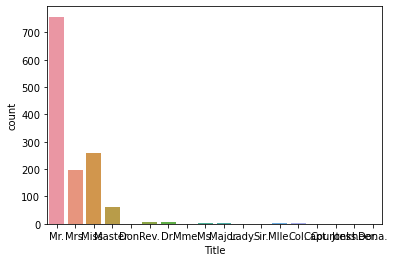

In [28]:
sns.countplot(x=df["Title"])

In [29]:
df['Sex'].value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [30]:
df["Title"]=df["Title"].replace(["Ms.","Mlle."],"Miss")
df["Title"]=df["Title"].replace(["Mme.","Countess.","Lady.","Dona."],"Mrs")
df["Title"]=df["Title"].replace(["Rev.","Jonkheer.","Don.","Sir.","Major.","Dr.","Capt.","Col."],"Mr")

In [31]:
df["Title"].value_counts()

Mr.        757
Miss.      260
Mrs.       197
Master.     61
Mr          26
Mrs          4
Miss         4
Name: Title, dtype: int64

In [32]:
df["Title"]=df["Title"].replace(["Miss"],"Miss.")
df["Title"]=df["Title"].replace(["Mrs"],"Mrs.")
df["Title"]=df["Title"].replace(["Mr"],"Mr.")

In [33]:
df["Title"].value_counts()

Mr.        783
Miss.      264
Mrs.       201
Master.     61
Name: Title, dtype: int64

In [34]:
df.Age.describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [35]:
df.groupby('Sex')['Age'].mean()

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

In [36]:
df[df['Age']<18]['Age'].mean()

9.101753246753248

In [37]:
df["Age"]=df["Age"].fillna(df.groupby("Title")["Age"].transform("median"))

In [38]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title            0
dtype: int64

In [39]:
df["Family"]=df["SibSp"]+df["Parch"]+1

In [40]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Family
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr.,2
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs.,2
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss.,1
3,4,1.0,1,female,35.0,1,0,113803,53.1000,S,Mrs.,2
4,5,0.0,3,male,35.0,0,0,373450,8.0500,S,Mr.,1


In [41]:
df.drop(['PassengerId','Ticket'],axis=1, inplace=True)

In [42]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family
0,0.0,3,male,22.0,1,0,7.2500,S,Mr.,2
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs.,2
2,1.0,3,female,26.0,0,0,7.9250,S,Miss.,1
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs.,2
4,0.0,3,male,35.0,0,0,8.0500,S,Mr.,1


In [43]:
data=pd.get_dummies(df,drop_first=True)

In [44]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Title_Miss.,Title_Mr.,Title_Mrs.
0,0.0,3,22.0,1,0,7.2500,2,1,0,1,0,1,0
1,1.0,1,38.0,1,0,71.2833,2,0,0,0,0,0,1
2,1.0,3,26.0,0,0,7.9250,1,0,0,1,1,0,0
3,1.0,1,35.0,1,0,53.1000,2,0,0,1,0,0,1
4,0.0,3,35.0,0,0,8.0500,1,1,0,1,0,1,0


In [45]:
train=data[:891]
test=data[891: ]

In [46]:
y=train['Survived']

In [47]:
x=train.drop('Survived',axis=1)

In [48]:
# Makine artik ogrenmeye hazir

In [49]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
g=GaussianNB()
b=BernoulliNB()


In [50]:
g.fit(x,y)
b.fit(x,y)

BernoulliNB()

In [51]:
test.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Title_Miss.,Title_Mr.,Title_Mrs.
0,NaN,3,34.5,0,0,7.8292,1,1,1,0,0,1,0
1,NaN,3,47.0,1,0,7.0000,2,0,0,1,0,0,1
2,NaN,2,62.0,0,0,9.6875,1,1,1,0,0,1,0
3,NaN,3,27.0,0,0,8.6625,1,1,0,1,0,1,0
4,NaN,3,22.0,1,1,12.2875,3,0,0,1,0,0,1


In [52]:
del test["Survived"]

In [53]:
tahmin1= g.predict(test)

In [54]:
sonuc=df2[['PassengerId']]

In [55]:
sonuc['Survived']=tahmin1

In [56]:
sonuc['Survived']=sonuc['Survived'].astype('int64')

In [57]:
sonuc.to_csv('titanicprediction.csv',index=False)